In [1]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 9.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=25f6a402ff6c0f00a21b57905bce7259eba3b52373cbb46751fe4ab0483725fc
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import lifelines
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/content/turnover.csv", encoding = "ISO-8859-1")
data.head(7)

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
5,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
6,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7


In [4]:
data = data.rename(columns={"stag": "experience"})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   experience    1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [6]:
data.describe()

,experience,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.096597,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**Visualizations**

In [7]:
fig = px.bar(data["event"].value_counts().reset_index().rename(
    columns={"event": "count", "index": "event"}
), x="event", y="count")
fig.show()

In [8]:
fig = px.box(data, x="event", y="age", color="gender")
fig.show()

In [10]:
fig = make_subplots(rows=3, cols=2, subplot_titles=("Extraversion", "Independ", "Self control", "Anxiety", "Novator"))

fig.add_trace(go.Violin(
    x=data["event"],
    y=data["extraversion"],
    box_visible=True), row=1, col=1,
)
fig.add_trace(go.Violin(
    x=data["event"],
    y=data["independ"],
    box_visible=True), row=1, col=2,
)
fig.add_trace(go.Violin(
    x=data["event"],
    y=data["selfcontrol"],
    box_visible=True), row=2, col=1,
)
fig.add_trace(go.Violin(
    x=data["event"],
    y=data["anxiety"],
    box_visible=True), row=2, col=2,
)
fig.add_trace(go.Violin(
    x=data["event"],
    y=data["novator"],
    box_visible=True), row=3, col=1,
)
fig.update_layout(showlegend=False)
fig.show()

In [11]:
fig = px.bar(data["industry"].value_counts(ascending=True).reset_index().rename(
    columns={"industry": "count", "index": "industry"}
), x="count", y="industry", orientation="h")
fig.show()

In [12]:
fig = px.bar(data["profession"].value_counts(ascending=True).reset_index().rename(
    columns={"profession": "count", "index": "profession"}
), x="count", y="profession", orientation="h")
fig.show()

In [13]:
data["coach"].value_counts()

no         683
my head    314
yes        132
Name: coach, dtype: int64

In [14]:
data["greywage"].value_counts()

white    1002
grey      127
Name: greywage, dtype: int64

In [15]:
data["way"].value_counts()

bus     681
car     331
foot    117
Name: way, dtype: int64

In [16]:
data["traffic"].value_counts()

youjs          318
empjs          248
rabrecNErab    211
friends        118
referal         95
KA              67
recNErab        39
advert          33
Name: traffic, dtype: int64

**Kaplan-Meier survival curve**

<Axes: xlabel='timeline'>

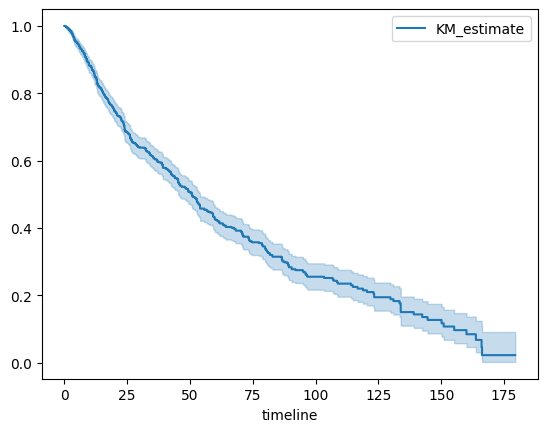

In [17]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(durations=data["experience"], event_observed=data["event"])
kmf.plot_survival_function()

<Axes: xlabel='timeline'>

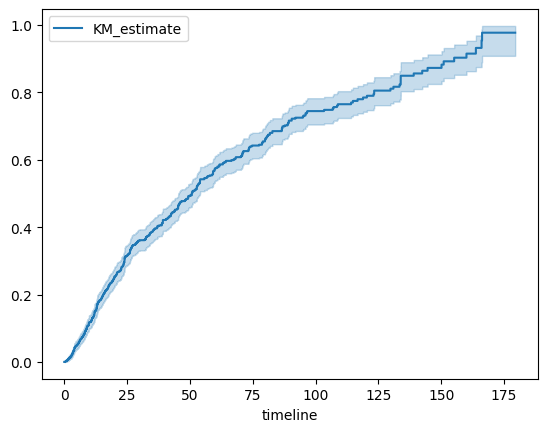

In [18]:
# probability of turnover
kmf.plot_cumulative_density()

In [19]:
print(f"Median survival time = {kmf.median_survival_time_}")

Median survival time = 50.72689938


**Data processing**

In [20]:
data["gender"] = data["gender"].map({"m": 0, "f": 1})
data["head_gender"] = data["head_gender"].map({"m": 0, "f": 1})
data["greywage"] = data["greywage"].map({"white": 0, "grey": 1})
data.head(3)

,experience,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,0,35.0,Banks,HR,rabrecNErab,no,1,0,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,0,33.0,Banks,HR,empjs,no,0,0,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,1,35.0,PowerGeneration,HR,rabrecNErab,no,0,0,bus,6.2,6.2,2.6,4.8,8.3


In [21]:
data_enc = pd.get_dummies(data, columns = ["industry", "profession", "traffic", "coach", "way"], drop_first=True)
data_enc.head()

,experience,event,gender,age,head_gender,greywage,extraversion,independ,selfcontrol,anxiety,...,traffic_empjs,traffic_friends,traffic_rabrecNErab,traffic_recNErab,traffic_referal,traffic_youjs,coach_no,coach_yes,way_car,way_foot
0,7.030801,1,0,35.0,1,0,6.2,4.1,5.7,7.1,...,0,0,1,0,0,0,1,0,0,0
1,22.965092,1,0,33.0,0,0,6.2,4.1,5.7,7.1,...,1,0,0,0,0,0,1,0,0,0
2,15.934292,1,1,35.0,0,0,6.2,6.2,2.6,4.8,...,0,0,1,0,0,0,1,0,0,0
3,15.934292,1,1,35.0,0,0,5.4,7.6,4.9,2.5,...,0,0,1,0,0,0,1,0,0,0
4,8.410678,1,0,32.0,1,0,3.0,4.1,8.0,7.1,...,0,0,0,0,0,1,0,1,0,0


**Cox Proportional Hazards Model**

In [22]:
cox = lifelines.CoxPHFitter()
cox.fit(data_enc, duration_col="experience", event_col="event")
cox.print_summary()

<lifelines.CoxPHFitter: fitted with 1129 total observations, 558 right-censored observations>
             duration col = 'experience'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1129
number of events observed = 571
   partial log-likelihood = -3385.27
         time fit was run = 2023-12-12 13:29:37 UTC

---
                                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                              
gender                           0.11       1.12       0.13            -0.14             0.36                 0.87                 1.43
age                              0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
head_gender                     -0.07       0.94       0.10            -0.27             0.13                 0.77                 1.14
greywage                         0.49       1.63       0.13             0.23             0.75                 1.25                 2.12
extraversion                     0.02       1.02       0.04            -0.05             0.09                 0.95                 1.09
independ                        -0.01       0.99       0.04            -0.08             0.06                 0.92                 1.06
selfcontrol                     -0.05       0.95       0.04            -0.12             0.02                 0.89                 1.02
anxiety                         -0.05       0.95       0.03            -0.12             0.01                 0.89                 1.01
novator                          0.01       1.01       0.03            -0.05             0.07                 0.95                 1.07
industry_Agriculture             0.66       1.93       0.55            -0.41             1.73                 0.66                 5.61
industry_Banks                   0.41       1.51       0.44            -0.45             1.27                 0.64                 3.55
industry_Building                0.43       1.53       0.46            -0.48             1.33                 0.62                 3.79
industry_Consult                 0.28       1.32       0.45            -0.61             1.16                 0.54                 3.20
industry_IT                     -0.53       0.59       0.45            -1.42             0.36                 0.24                 1.44
industry_Mining                  0.07       1.07       0.52            -0.95             1.08                 0.39                 2.94
industry_Pharma                 -0.23       0.79       0.53            -1.27             0.81                 0.28                 2.26
industry_PowerGeneration        -0.26       0.77       0.50            -1.24             0.72                 0.29                 2.05
industry_RealEstate             -1.06       0.35       0.63            -2.29             0.18                 0.10                 1.20
industry_Retail                 -0.33       0.72       0.43            -1.18             0.51                 0.31                 1.67
industry_State                   0.01       1.01       0.48            -0.93             0.94                 0.39                 2.57
industry_Telecom                -0.52       0.59       0.50            -1.51             0.46                 0.22                 1.59
industry_etc                     0.09       1.09       0.44            -0.78             0.96                 0.46                 2.61
industry_manufacture            -0.14       0.87       0.44            -0.99             0.72                 0.37                 2.05
industry_transport              -0.19       0.83       0.49            -1.15             0.78                 0.32                 2.18
profession_BusinessDevelopment   0.60       1.82       0.51            -0.40             1.59     

<Axes: xlabel='log(HR) (95% CI)'>

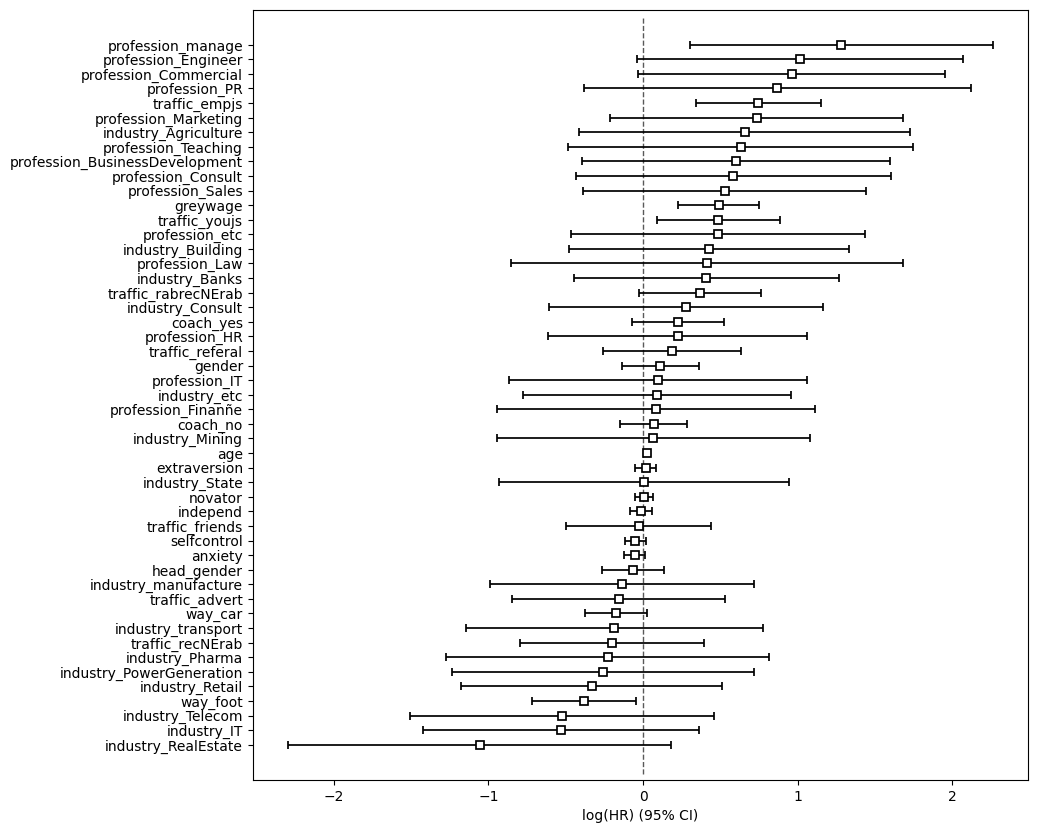

In [23]:
plt.subplots(figsize = (10, 10))
cox.plot()

<Axes: >

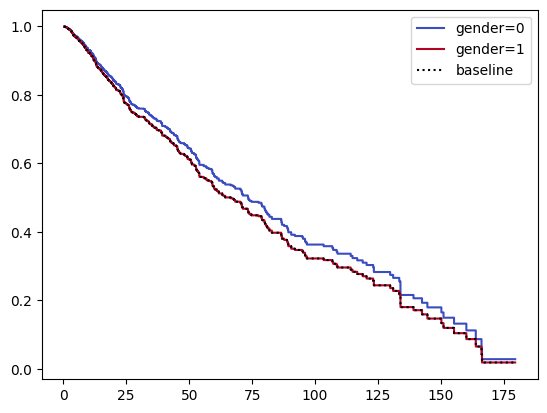

In [24]:
cox.plot_partial_effects_on_outcome(covariates = "gender", values = [0, 1], cmap = "coolwarm")